# Packages

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Import

In [2]:
wine_review_df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
wine_review_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine_review_df.drop(inplace=True, columns=['Unnamed: 0'])
wine_review_df.drop(inplace=True, columns=['taster_twitter_handle'])

# Duplicate

In [5]:
wine_review_df.duplicated().sum()

9983

In [6]:
wine_review_df.drop_duplicates(inplace=True)

In [7]:
wine_review_df.duplicated().sum()

0

# Missing Values

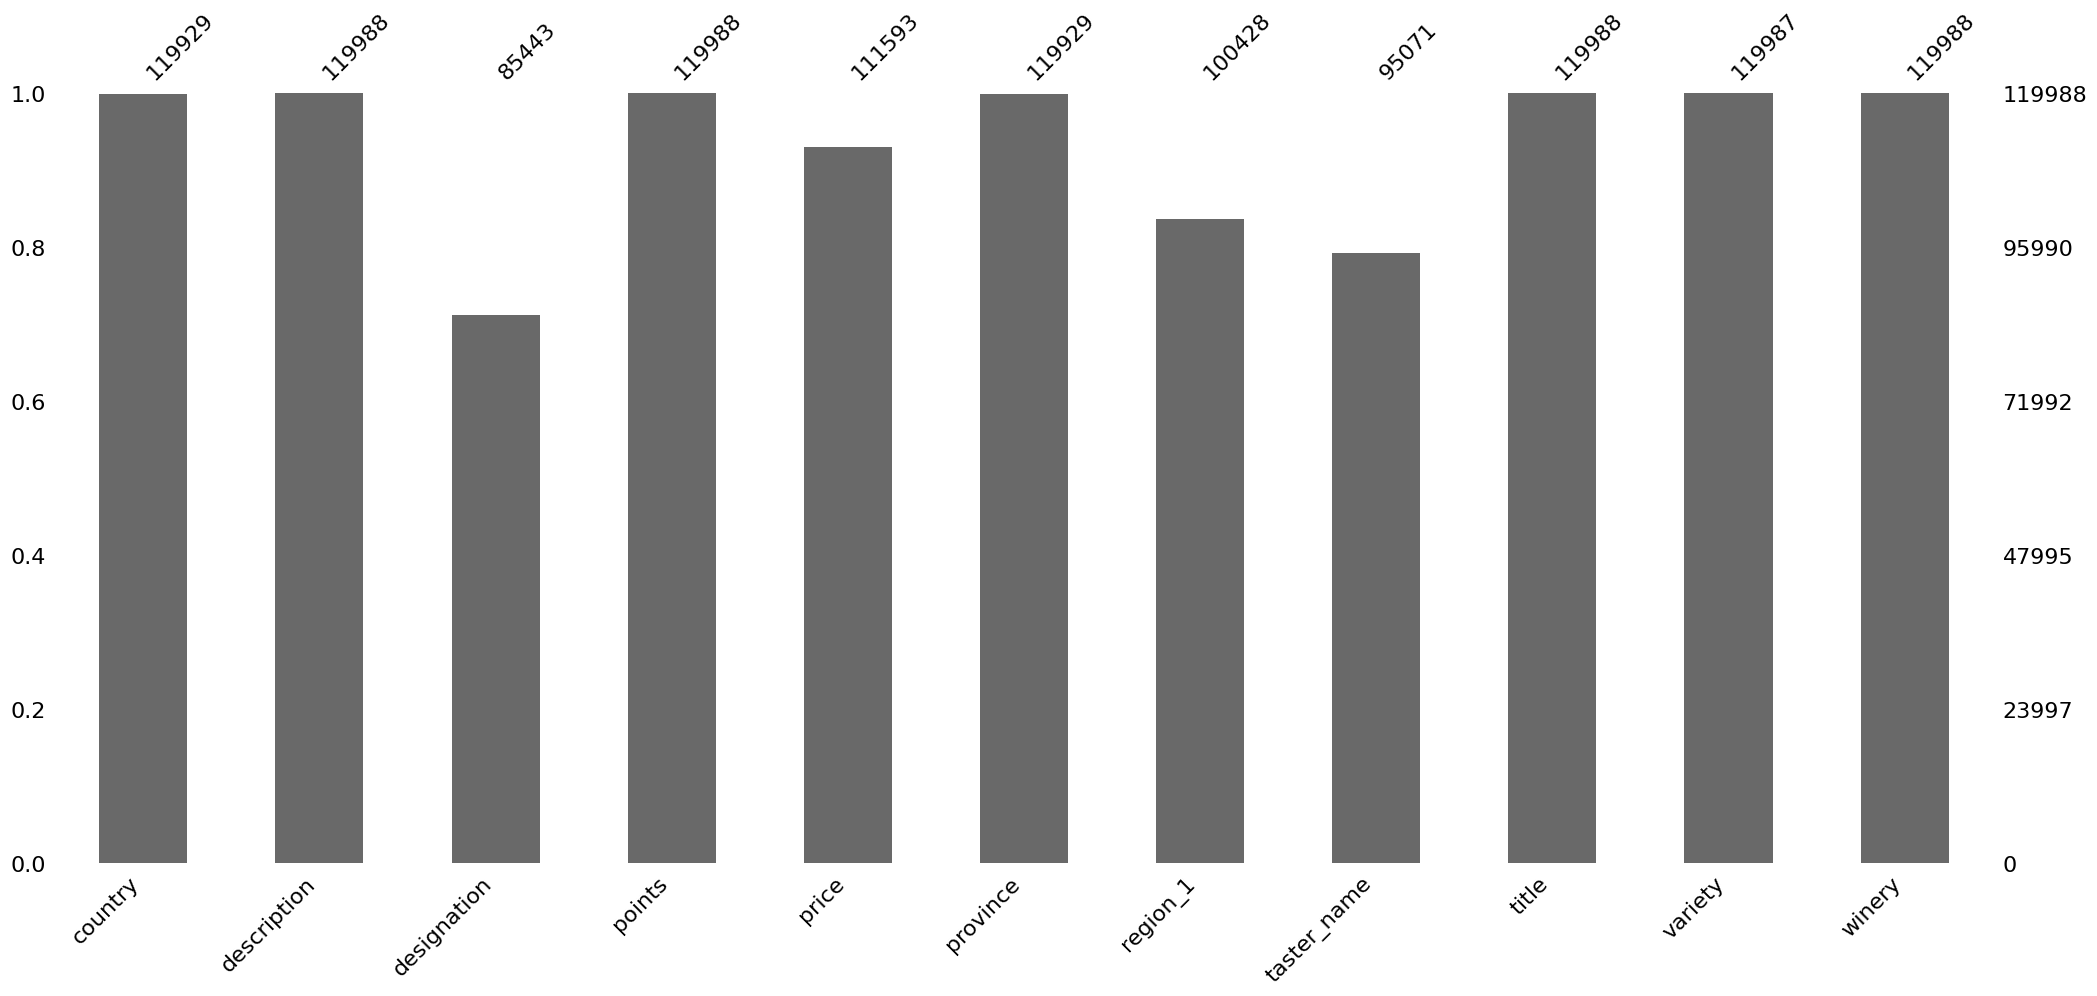

In [17]:
msno.bar(wine_review_df)
plt.show()

## Systematic Missingness

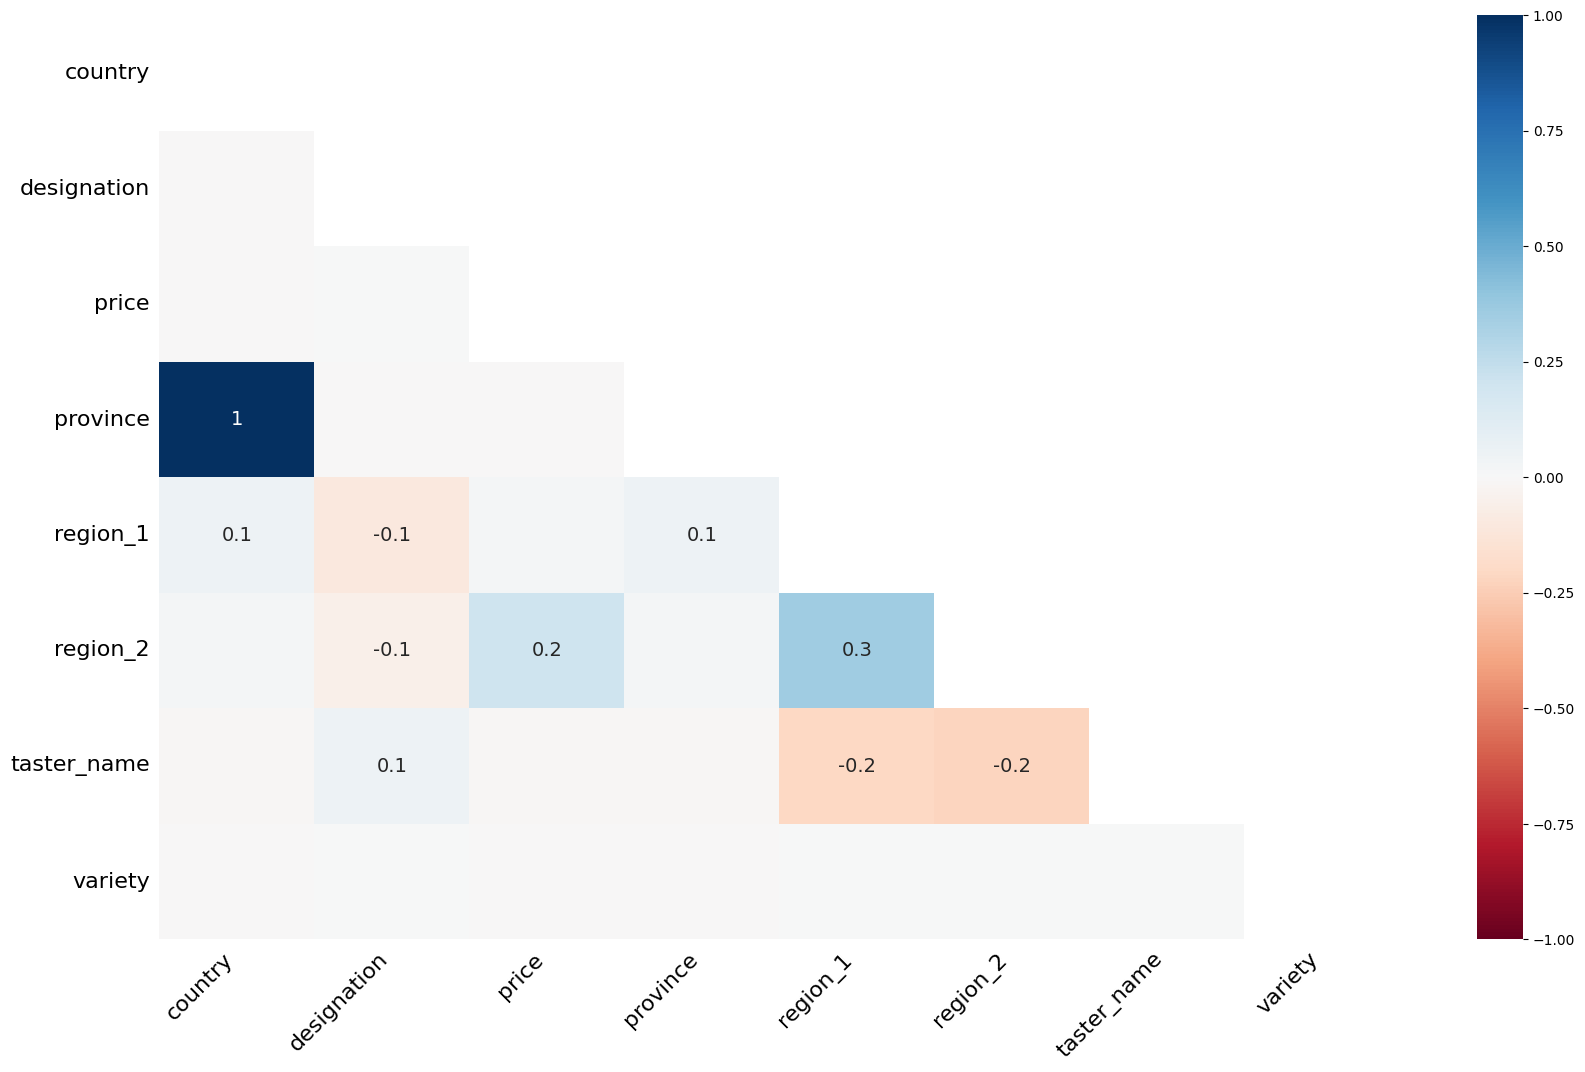

In [9]:
msno.heatmap(wine_review_df)
plt.show()

## Region_2

In [10]:
wine_review_df.region_1.value_counts()

region_1
Napa Valley                    4174
Columbia Valley (WA)           3795
Russian River Valley           2862
California                     2468
Paso Robles                    2155
                               ... 
Vin Santo di Carmignano           1
Vino de la Tierra de Zamora       1
Napa-Monterey-Mendocino           1
Brindisi                          1
Paestum                           1
Name: count, Length: 1229, dtype: int64

In [11]:
wine_review_df.region_2.value_counts()

region_2
Central Coast        10233
Sonoma                8390
Columbia Valley       7466
Napa                  6369
Willamette Valley     3142
California Other      2499
Finger Lakes          1642
Sierra Foothills      1345
Napa-Sonoma           1084
Central Valley         992
Southern Oregon        840
Oregon Other           671
Long Island            609
North Coast            534
Washington Other       497
South Coast            251
New York Other         205
Name: count, dtype: int64

In [12]:
wine_review_df.drop('region_2', axis=1, inplace=True)

## Price

<Axes: >

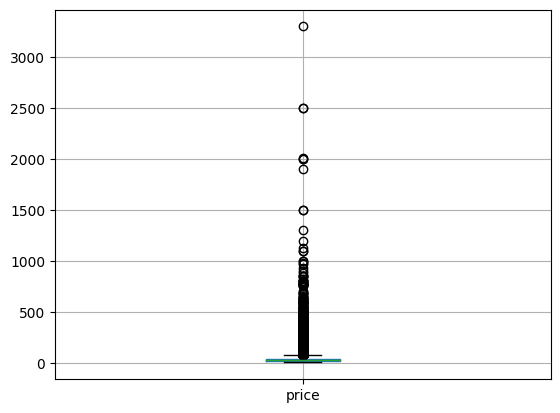

In [13]:
wine_review_df.boxplot(column='price')

In [14]:
wine_review_df[wine_review_df['price'] < 1]

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery


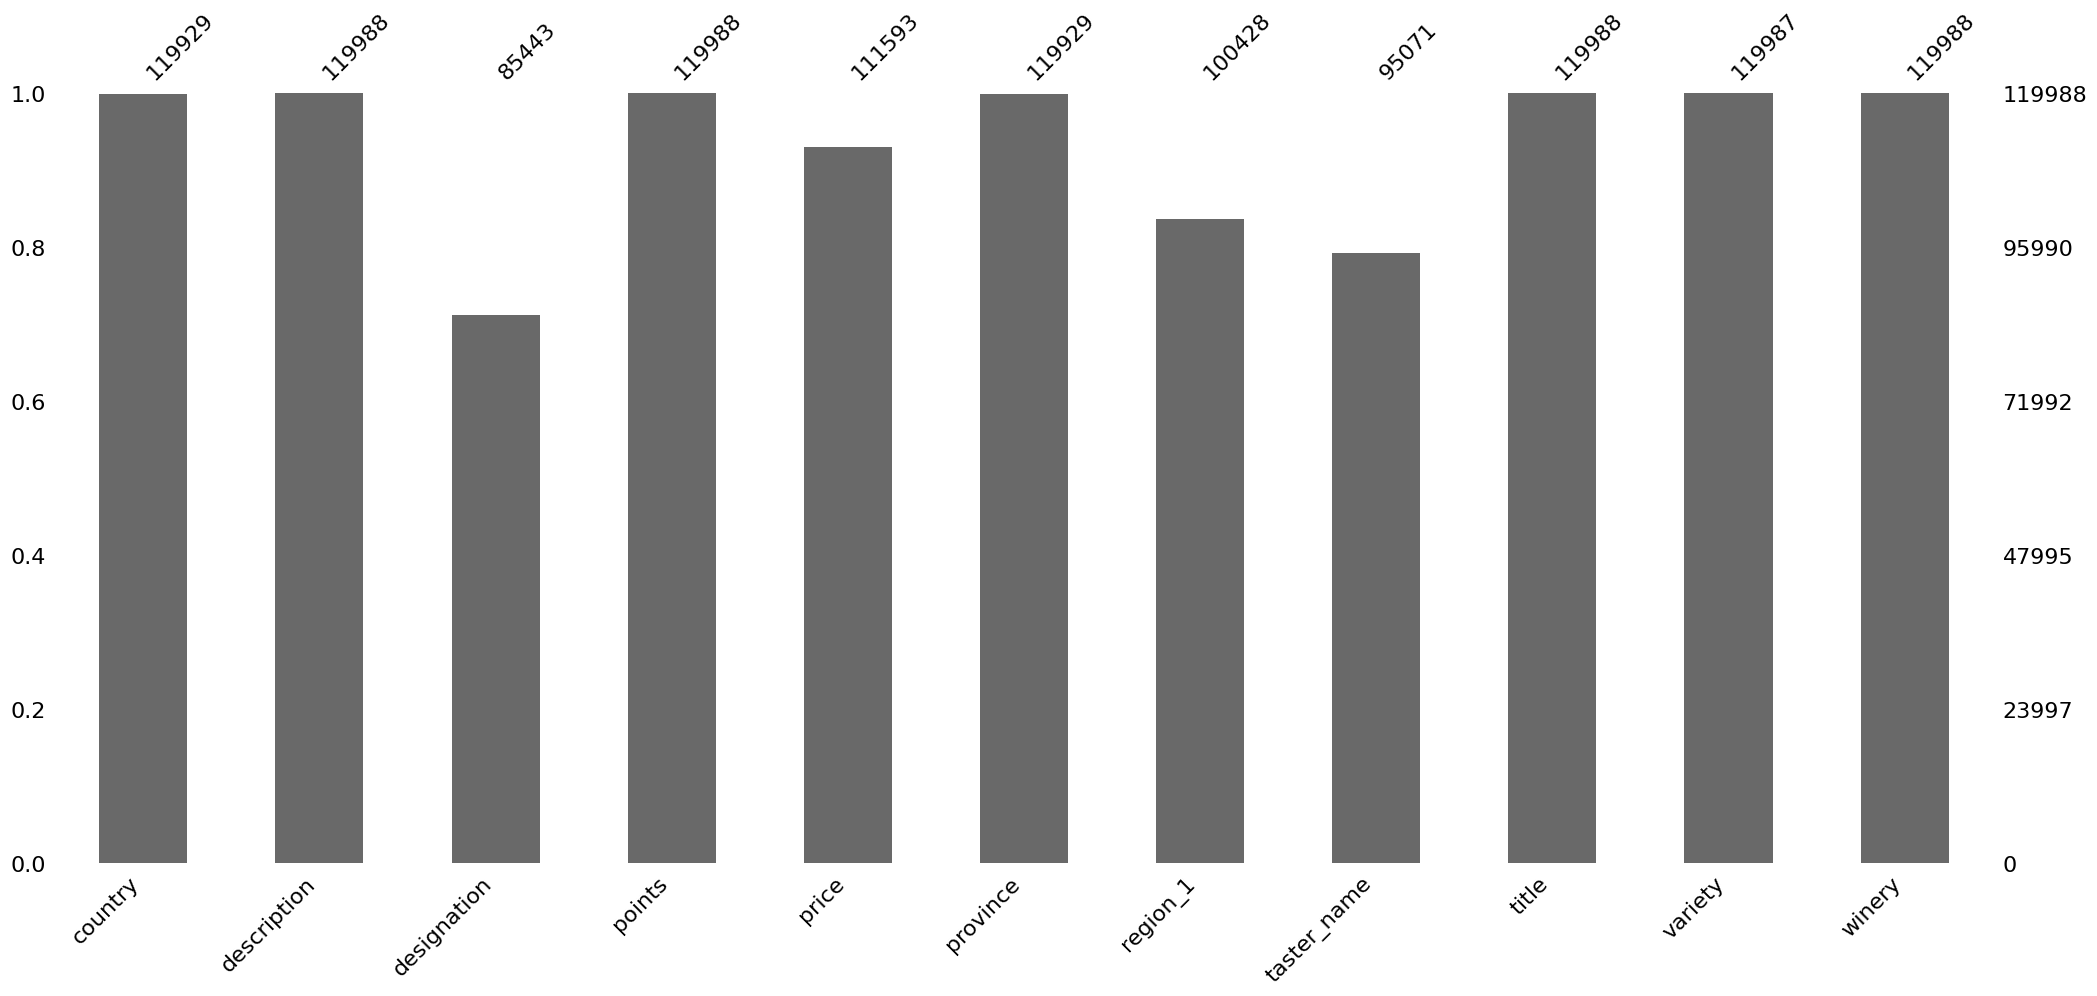

In [16]:
msno.bar(wine_review_df)
plt.show()

## EDA / Cleansing

## Country

In [19]:
wine_review_df.country.value_counts()

country
US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14


## Description

In [21]:
wine_review_df.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [24]:
words_to_remove = ['and', 'much', 'like', 'the', 'from', 'this']

def remove_words(text):
    words = text.split()
    cleaned_words = [word.lower().replace(',', '') for word in words if word.lower() not in words_to_remove and len(word) > 2]
    return ' '.join(cleaned_words)

wine_review_df['description'] = wine_review_df['description'].apply(remove_words)


In [25]:
wine_review_df.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,ripe fruity wine that smooth while still struc...,Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,tart snappy flavors lime flesh rind dominate. ...,NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,regular bottling 2012 comes across rather roug...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Designation

In [28]:
len(wine_review_df['designation'].unique())

37980

In [30]:
import Levenshtein
wine_review_df['designation'].fillna('unknown', inplace=True)
# create a list of unique designations
designations = wine_review_df['designation'].unique()

# create a dictionary to store similar words
similar_words = {}

# loop through each designation and compare it with all other designations
for i in range(len(designations)):
    for j in range(i+1, len(designations)):
        distance = Levenshtein.distance(designations[i], designations[j])
        if distance <= 1:
            if designations[i] not in similar_words:
                similar_words[designations[i]] = [designations[j]]
            else:
                similar_words[designations[i]].append(designations[j])

# print the similar words
for key, value in similar_words.items():
    print(key, value)


Shine ['Shiny']
Mountain Cuvée ['Mountain Cuvee']
Devon ['Devin']
Signature Selection ['Signture Selection']
Dalila ['Davila']
Calanìca Nero d'Avola-Merlot ["Calanica Nero d'Avola-Merlot"]
Hyland ['Ryland']
Estate ['Estates']
Gran Reserva ['Grand Reserva', 'Gran Reserve']
Dolia ['Donia', 'Doria']
Estate Bottled ['Estate bottled']
Reserve ['Reserva', 'Réserve', 'Rezerve', 'ReZerve', 'Reseve']
Brut Rosé ['Brut Rose', 'Bruto Rosé']
Inspired ['Inspire']
Old Vine ['Old Vines', 'Old VIne']
Estate Grown ['Estate grown']
Made With Organic Grapes ['Made with Organic Grapes']
Rosé of ['Rose of']
La Réserve ['La Reserve']
Classic ['Classico', 'Classica', 'ClassiQ', 'Clássic', 'Classik', 'Clàssic', 'Classici']
Blau Vineyards ['Blau Vineyard']
Nativo ['Native']
Castiglioni ['Castiglione']
Vendages Tardives ['Vendanges Tardives']
Grand Reserve ['Grande Reserve', 'Grand Réserve', 'Grand Reserva', 'Gran Reserve']
Sorano ['Solano']
K Block ['Y Block', 'V Block', '5 Block', 'H Block', 'D Block']
Family 